1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management)
2. Model Training: training a regression model. Analysis of metrics (i.e. R2_score, mean squared error,...)
3. Creating a Visual Analytics web app based on Streamlit to facilitate the exploration of data and prediction of the salary.



We have access to an annual survey by Stack Overflow where we can find more than 67K software developers' answers. Part of the survey includes salary, experience, country, full/partial time employee, language, demographic information and so on.



# 1. Data Gathering
In the survey_results_schema.csv and the survey_results_public.csv you will obtain the schema of the survey and the responses.

Let's import some basic libraries and upload the **survey_results_public.csv** file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/survey_results_public.csv")

Let's explore the data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [4]:
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


# 2. Data Exploration and Data Wrangling

**EX1** Let's select the variables we are interested in: `Country`, `Education`, `YearsCodePro`, `Employment` and `ConvertedCompYearly`. Rename `ConvertedCompYearly` to `Salary`.

**EX2** Remove the registers with any null in the features and verify all registers are not null

Let's see the data again

In [5]:
selected_columns = ['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']
df = df[selected_columns].rename(columns={'ConvertedCompYearly': 'Salary'})
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


**EX3** Select the registers in the dataset that are full-employed and remove "employment" column

In [6]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop(columns=['Employment'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**EX4** Count the regiters per country and move all countries with less than cut-off registers to "Other"

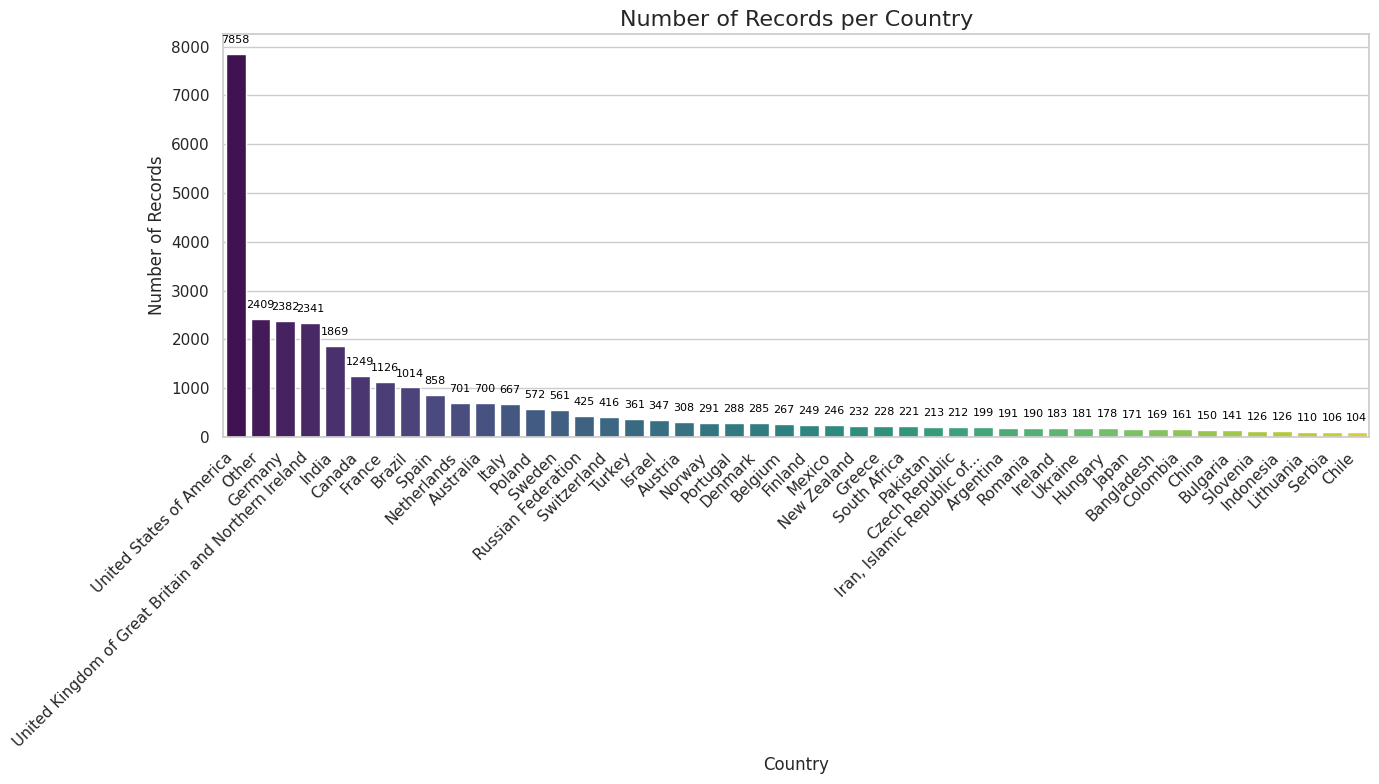

In [8]:
import seaborn as sns
df_counts = df['Country'].value_counts()
df_1 = df.copy()
# Set a cutoff threshold
cutoff = 100  # Adjust this based on the amount of countries

countries_below_cutoff = df_counts[df_counts < cutoff].index

# Replace countries below cutoff with 'Other'
df_1['Country'] = df['Country'].apply(lambda x: 'Other' if x in countries_below_cutoff else x)


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
barplot = sns.barplot(x=df_1['Country'].value_counts().index,
                      y=df_1['Country'].value_counts(),
                      palette="viridis",
                      order=df_1['Country'].value_counts().index)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Records')
plt.title('Number of Records per Country', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the count on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points', fontsize=8, color='black')

# Show the plot
plt.tight_layout()
plt.show()


**EX5** To analyze the distribution of salaries per countries, build a boxplot per `country` and `salary`.

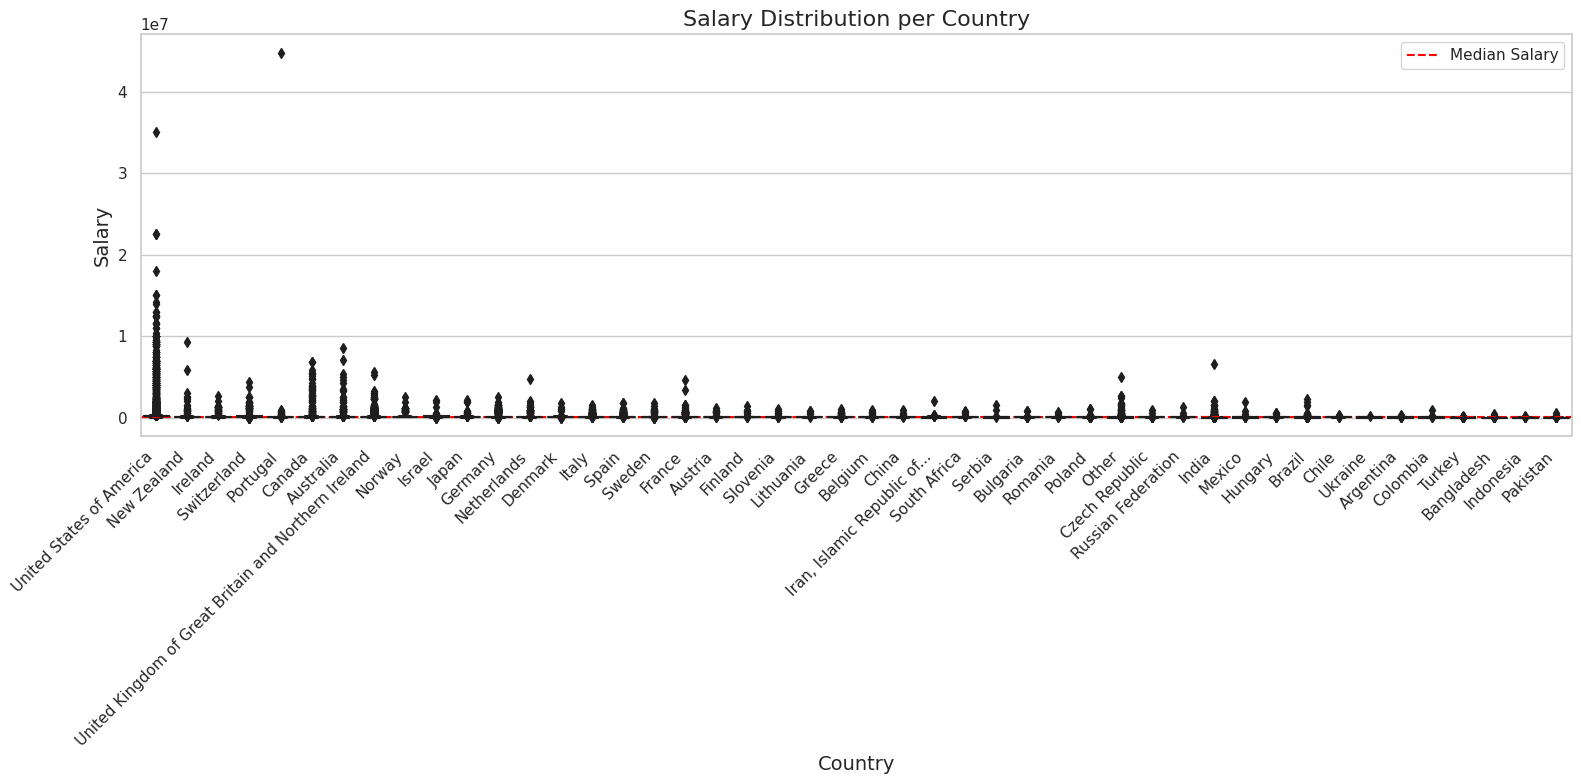

In [9]:
# Calculate mean salary for each country
mean_salary_by_country = df_1.groupby('Country')['Salary'].mean().sort_values(ascending=False).index

# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for salary distribution per country with enhanced aesthetics
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x='Country', y='Salary', data=df_1,
                      order=mean_salary_by_country,
                      palette="viridis")  # You can choose a different color palette

# Add labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Salary Distribution per Country', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Customize the plot by adding a horizontal grid
plt.axhline(y=df_1['Salary'].median(), color='red', linestyle='--', label='Median Salary')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Alternatives to boxplot:

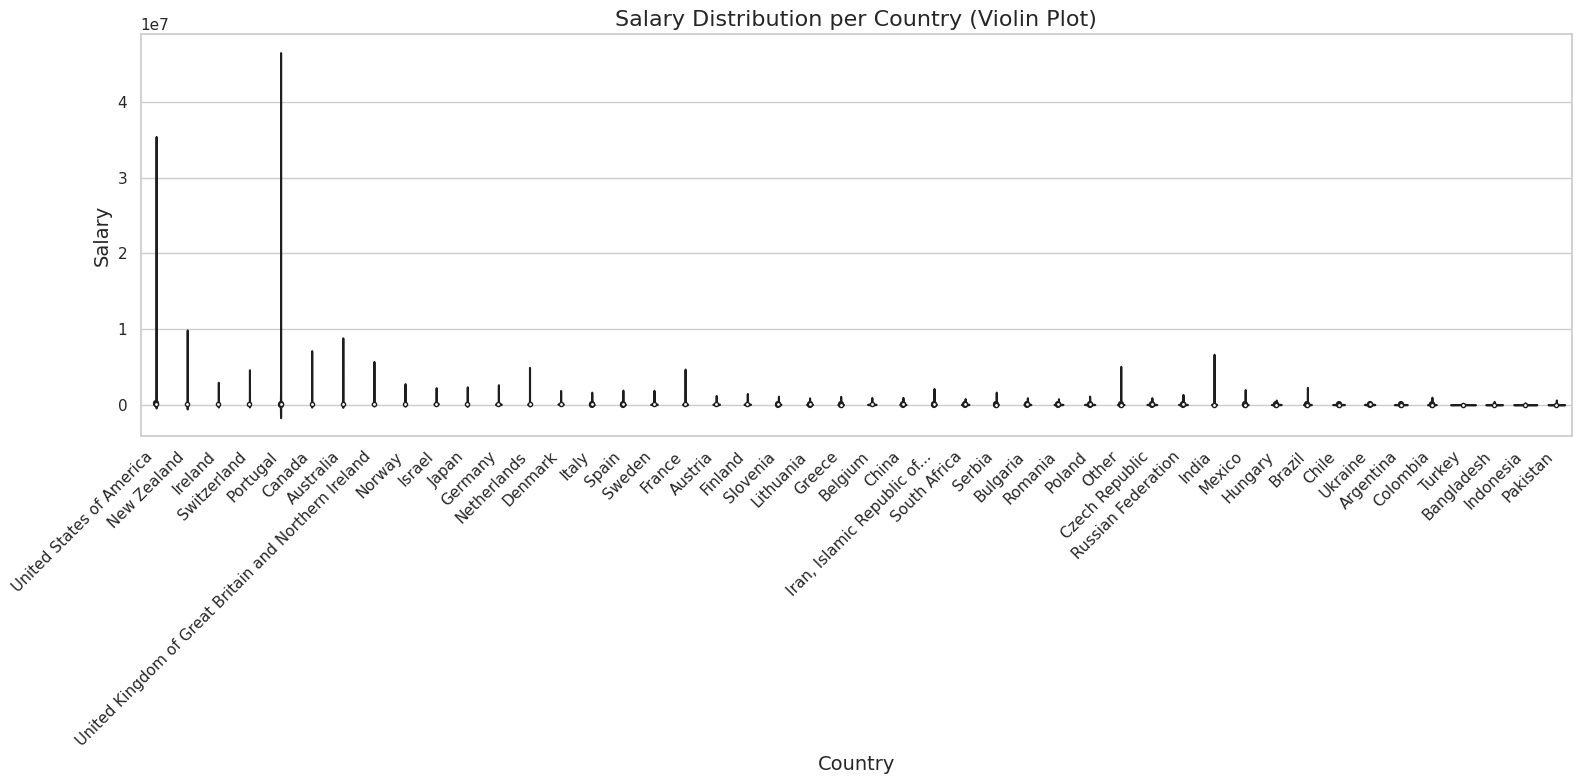

In [10]:
# Calculate mean salary for each country
mean_salary_by_country = df_1.groupby('Country')['Salary'].mean().sort_values(ascending=False).index

# Set the plot style
sns.set(style="whitegrid")

# Create a violin plot for salary distribution per country
plt.figure(figsize=(16, 8))
violinplot = sns.violinplot(x='Country', y='Salary', data=df_1,
                            order=mean_salary_by_country,
                            palette="viridis")  # You can choose a different color palette

# Add labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Salary Distribution per Country (Violin Plot)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**EX6** To improve the resolution, filter the dataset based on salary between 10K and 250K and verify the distribution of salaries per country. Which are the most relevant insights based on these new boxplots?

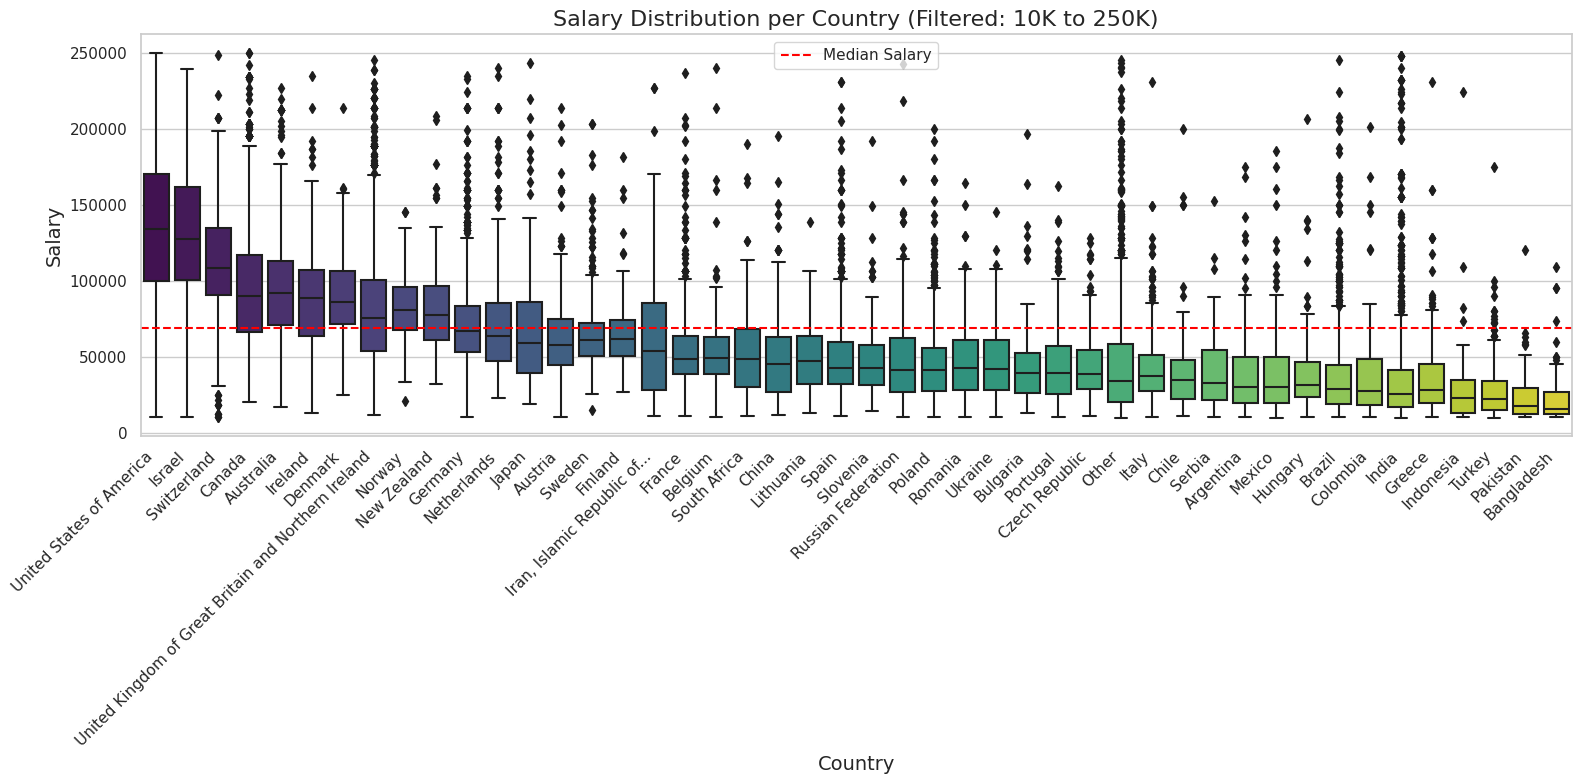

In [12]:
# Filter the dataset based on salary range
df_1 = df_1[(df_1['Salary'] >= 10000) & (df_1['Salary'] <= 250000)]

# Calculate mean salary for each country
mean_salary_by_country = df_1.groupby('Country')['Salary'].mean().sort_values(ascending=False).index

# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for salary distribution per country with enhanced aesthetics
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x='Country', y='Salary', data=df_1,
                      order=mean_salary_by_country,
                      palette="viridis")  # You can choose a different color palette

# Add labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Salary Distribution per Country (Filtered: 10K to 250K)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Customize the plot by adding a horizontal grid
plt.axhline(y=df_1['Salary'].median(), color='red', linestyle='--', label='Median Salary')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



 **Insights:**

From the first boxplot there are hardly things to say. There are a lot of country and the variance on the salary is huge. Moreover, there are a large amount of outliers. Nevertheless, we can easily see that in USA the salaries for software developers is larger than in any other country.

Moving on to the filtered dataset, with salaries between 10k and 250k, we can get further insight. Firstly, we can see that most countries fall below the mean salary value over all countries. We still see a large amount of outliers in all the countries, which makes sense, because there will always be very valuable software developers in almost every country. We can see that countries with the top-earning software developers are USA, Israel, Switzerland and Canada, which makes sense because those countries are ahead in the race for technological advancement and invest a lot of capital in these sectors. On the other side, we observe that countries with the lowest paid salaries tend to be under developed countries, where there hasn't been a big digital revolution compared to the other countries. In some sense, this plot can also give insights about the state of digitalization in every country.

Let's prepare the `YearsCodePro` to integer. We will build a new **clean_experience()** function to encode over 50 years and below 0.5 years of experience respectively.

In [13]:
print(type(df_1["YearsCodePro"]))
df_1["YearsCodePro"].unique()

<class 'pandas.core.series.Series'>


array(['5', '17', '6', '2', '4', '10', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [14]:
df = df_1

In [15]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

Distribution on Years of experience:

<ipython-input-16-e052ae7eabaa>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(df['YearsCodePro'], bins=20, kde=True, palette='viridis')


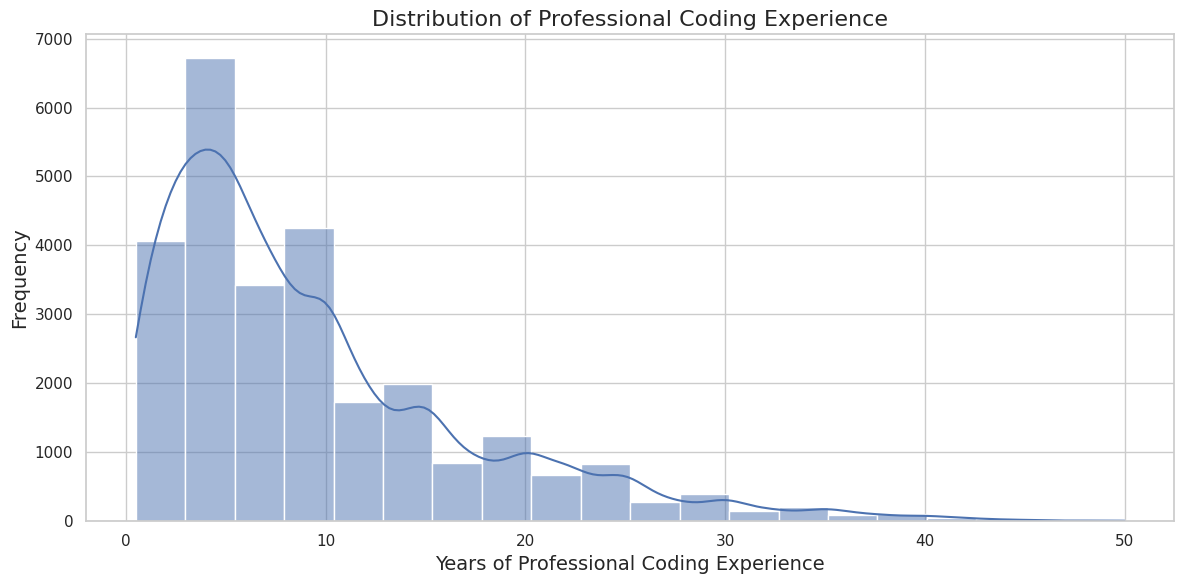

In [16]:
# Set the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
histplot = sns.histplot(df['YearsCodePro'], bins=20, kde=True, palette='viridis')
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Professional Coding Experience', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27080 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27080 non-null  object 
 1   EdLevel       27080 non-null  object 
 2   YearsCodePro  27080 non-null  float64
 3   Salary        27080 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.0+ MB


Let's normalize the different values of the `EdLevel`. We will build a new **clean_education** function to normalize the education levels.

In [18]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [19]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [20]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

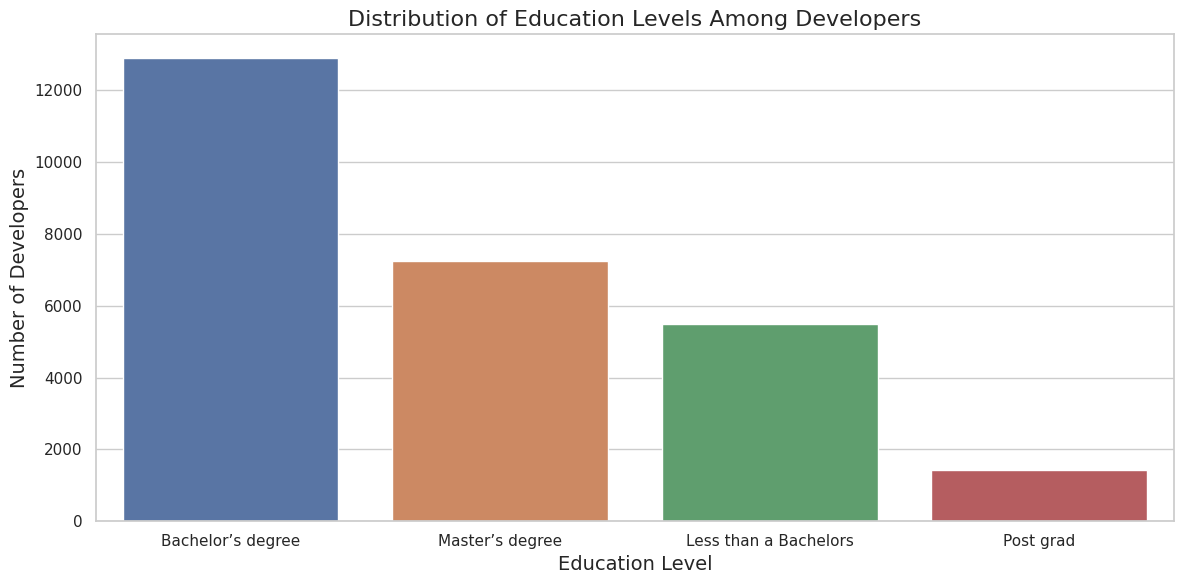

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
countplot = sns.countplot(x='EdLevel', data=df, order=df['EdLevel'].value_counts().index)

plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Number of Developers', fontsize=14)
plt.title('Distribution of Education Levels Among Developers', fontsize=16)

# Set the color of ticks to white
plt.tick_params(axis='both')

# Show the plot
plt.tight_layout()
plt.show()

**Getting the data for a map plot in streamlit:**

In [22]:
import pandas as pd
import geopandas as gpd
df_geo = df.copy()
# Load the Natural Earth dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df_geo['Country'] = df_geo['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_geo['Country'] = df_geo['Country'].replace('Russian Federation', 'Russia')
df_geo['Country'] = df_geo['Country'].replace('Iran, Islamic Republic of...', 'Iran')
df_geo['Country'] = df_geo['Country'].replace('Czech Republic' , 'Czech Rep.')


# Merge the DataFrame with the Natural Earth dataset to get 'lat' and 'lon' columns
df_geo = pd.merge(df_geo, world[['name', 'geometry']], left_on='Country', right_on='name', how='left')

# Extract latitude and longitude from the 'geometry' column
df_geo['lat'] = df_geo['geometry'].apply(lambda geom: geom.centroid.y if geom else None)
df_geo['lon'] = df_geo['geometry'].apply(lambda geom: geom.centroid.x if geom else None)

# Drop unnecessary columns
df_geo.drop(['name', 'geometry'], axis=1, inplace=True)

df_geo = df_geo.dropna()
print(df_geo.head())
df_geo.to_csv('geo_loc_df.csv', index=False)

<ipython-input-22-9dd1216d08f5>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


                    Country            EdLevel  YearsCodePro    Salary  \
0            United Kingdom    Master’s degree           5.0   40205.0   
1                    Israel  Bachelor’s degree          17.0  215232.0   
2               Netherlands    Master’s degree           6.0   49056.0   
3            United Kingdom  Bachelor’s degree           2.0   60307.0   
4  United States of America  Bachelor’s degree           5.0   65000.0   

         lat         lon  
0  53.914773   -2.853135  
1  31.484919   35.003851  
2  52.298700    5.512217  
3  53.914773   -2.853135  
4  45.705628 -112.599436  


**EX7** Encode using **LabelEncoder** function the `EdLevel` and `Country` columns. Store them into the same `EdLevel` and `Country` columns.

**Saving the data without label encodings for later use in streamlit**

In [23]:
df.to_csv('data_processed.csv', index=False)

In [24]:
df['Country'].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'Netherlands', 'United States of America', 'Czech Republic',
       'Austria', 'Italy', 'Canada', 'Germany', 'Poland', 'Norway',
       'Other', 'France', 'Brazil', 'Sweden', 'Spain', 'Turkey', 'India',
       'Belgium', 'Bulgaria', 'Ireland', 'Mexico', 'Switzerland',
       'South Africa', 'China', 'Finland', 'Denmark', 'Australia',
       'Greece', 'Portugal', 'Argentina', 'Hungary', 'Ukraine', 'Romania',
       'Serbia', 'Lithuania', 'Iran, Islamic Republic of...',
       'Bangladesh', 'Russian Federation', 'Pakistan', 'Chile',
       'Slovenia', 'New Zealand', 'Japan', 'Colombia', 'Indonesia'],
      dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
le_country = LabelEncoder()

df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['Country'] = le_country.fit_transform(df['Country'])


# 2. Modelling

We are ready to build a ML model to predict the salary based on the 3 variables: country, education level and years of experience.

**EX8** Split into train and test dataset and verify the length of all datasets.

In [26]:
from sklearn.model_selection import train_test_split

X = df[['Country', 'EdLevel', 'YearsCodePro']]
y = df['Salary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the lengths of the datasets
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

Length of X_train: 21664
Length of X_test: 5416
Length of y_train: 21664
Length of y_test: 5416


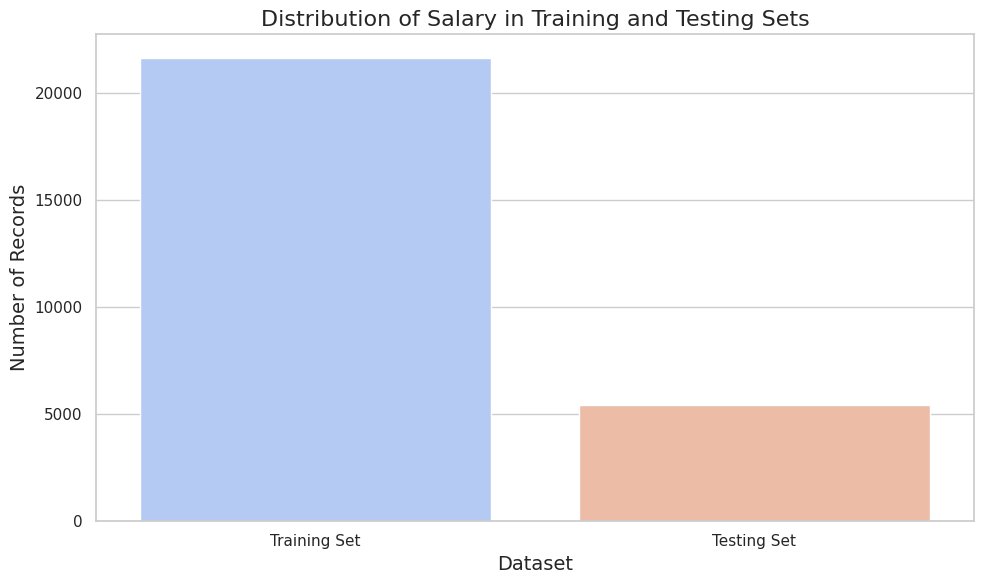

In [27]:
sns.set(style="whitegrid")

# Plot a bar plot for the distribution of salary in the training and testing sets
plt.figure(figsize=(10, 6))
sns.barplot(x=['Training Set', 'Testing Set'], y=[len(y_train), len(y_test)], palette="coolwarm")

# Add labels and title
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.title('Distribution of Salary in Training and Testing Sets', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

**EX9** Apply a Linear Regression model to fit and evaluate the performance of the prediction based on the mean squared error.

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)
y_pred_linear = model_linreg.predict(X_test)

mae = mean_absolute_error(y_pred_linear, y_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2 = r2_score(y_test, y_pred_linear)

print("Mean Absolute Error:", "${:,.02f}".format(mae))
print("Mean Squared Error:", "${:,.02f}".format(mse))
print("R-squared:", r2)

Mean Absolute Error: $35,832.41
Mean Squared Error: $45,793.86
R-squared: 0.23882353508259835


Applying a LightGBM to make it available in the streamlit app

In [29]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)



# Define your parameter grid
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

# Initialize your LightGBM model
gbm = lgb.LGBMRegressor(silent=False)

# Initialize GridSearchCV with 5-fold cross validation
grid = GridSearchCV(gbm, param_grid, cv=5)

# Fit the grid with your data
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)




Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. 

In [30]:
lgbm_regressor = grid.best_estimator_

lgbm_regressor.fit(X_train, y_train)
y_pred_lgbm = lgbm_regressor.predict(X_test)
# error = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("${:,.02f}".format(error))

mae = mean_absolute_error(y_test, y_pred_lgbm)
mse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2 = r2_score(y_test, y_pred_lgbm)


print("Mean Absolute Error:", "${:,.02f}".format(mae))
print("Mean Squared Error:", "${:,.02f}".format(mse))
print("R-squared:", r2)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 216

Applying Gradient Boosting to make it available in the streamlit app

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Feature engineering (add your own feature engineering steps)
# X_train, X_test = feature_engineering(X_train, X_test)

# Hyperparameter tuning for GradientBoostingRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Create a pipeline with standardization and the model
pipeline = make_pipeline(StandardScaler(), grid_search)

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingRegressor(random_state=42),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.01, 0.1, 0.2],
                                          'max_depth': [3, 4, 5],
                                          'n_estimators': [50, 100, 200]},
                              scoring='neg_mean_squared_error'))])

In [32]:
# Make predictions
y_pred_gbm = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_pred_gbm, y_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
r2 = r2_score(y_test, y_pred_gbm)

print("Mean Absolute Error:", "${:,.02f}".format(mae))
print("Mean Squared Error:", "${:,.02f}".format(mse))
print("R-squared:", r2)

Mean Absolute Error: $23,713.23
Mean Squared Error: $33,508.52
R-squared: 0.5924495399162594


**EX10** Repeat the **EX9** using a RandomForest model. Has it improved the mean squared error?

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=12, max_depth=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf1 = rf_model.predict(X_test)

mae = mean_absolute_error(y_pred_rf1, y_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred_rf1))
r2 = r2_score(y_test, y_pred_rf1)

print("Mean Absolute Error:", "${:,.02f}".format(mae))
print("Mean Squared Error:", "${:,.02f}".format(mse))
print("R-squared:", r2)


Mean Absolute Error: $24,772.47
Mean Squared Error: $34,878.33
R-squared: 0.558447696943372


**Comparison**:

It has improved the mean error a lot. Linear Regression is a straightforward and interpretable choice for predicting salaries, particularly suitable when the relationship between predictors and salary is linear. However, it might struggle to capture more intricate patterns, which seems to be our case. On the other side, random Forest, known for handling non-linear relationships well, is robust to overfitting and can adapt to unbalanced datasets. Gradient Boosting Regressor, offering high predictive accuracy, can also handle unbalanced datasets but it also requires careful tuning to prevent overfitting.

In order to find the best hyperparameters for the regression model, we will use **GridsearchCV** apply to the Random Forest.

In [34]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 6,8, 12]
n_estimatorsint=[None, 50,100,200,300,500]
parameters = {"max_depth": max_depth, "n_estimators": n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 6, 8, 12],
                         'n_estimators': [None, 50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

Once calculate the **best estimator**, we will apply to our use case and calculate the **mean squared error**.

**EX11** Calculate the performance based on **R2 score** of the regression model fitted with the best estimator. Which is your consideration about the performance of the model? Justify your answer.

In [35]:
random_forest_reg = gs.best_estimator_

random_forest_reg.fit(X_train, y_train)
y_pred_test_rf2 = random_forest_reg.predict(X_test)
# error = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("${:,.02f}".format(error))

mae = mean_absolute_error(y_test, y_pred_test_rf2)
mse = np.sqrt(mean_squared_error(y_test, y_pred_test_rf2))
r2 = r2_score(y_test, y_pred_test_rf2)


print("Mean Absolute Error:", "${:,.02f}".format(mae))
print("Mean Squared Error:", "${:,.02f}".format(mse))
print("R-squared:", r2)

Mean Absolute Error: $24,088.06
Mean Squared Error: $33,899.53
R-squared: 0.5828827135769472


Applying a Neural Network to make it available in the streamlit app

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


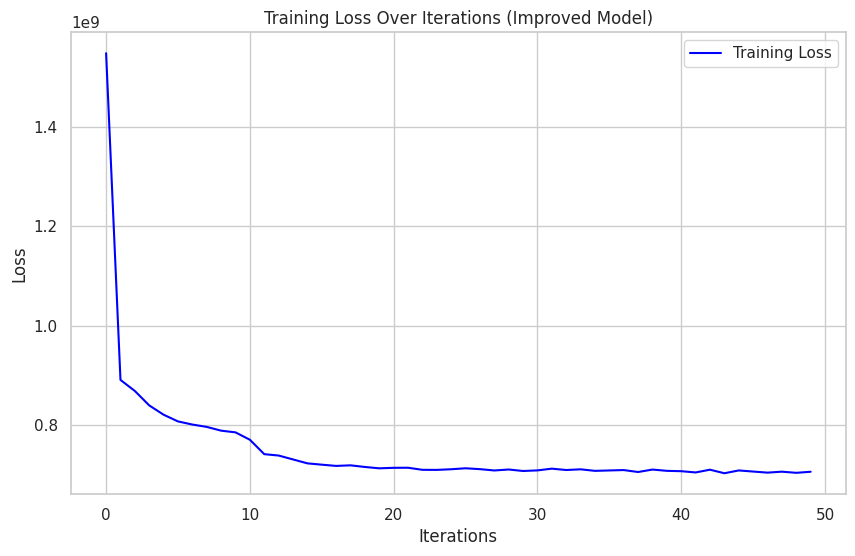

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the improved neural network model
model_nn = MLPRegressor(hidden_layer_sizes=(128, 64, 32),
                             activation='relu',
                             alpha=0.01,
                             max_iter=50,
                             batch_size=64,
                             learning_rate_init=1e-2,
                             random_state=42)

# Train the improved model
model_nn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nn = model_nn.predict(X_test_scaled)

# Plot the training and validation loss for the improved model
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(model_nn.loss_curve_, label='Training Loss', color='blue')
plt.title('Training Loss Over Iterations (Improved Model)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
y_pred_nn = model_nn.predict(X_test_scaled).flatten()
mae = mean_absolute_error(y_test, y_pred_nn)
mse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2 = r2_score(y_test, y_pred_nn)


print("Mean Absolute Error:", "${:,.02f}".format(mae))
print("Mean Squared Error:", "${:,.02f}".format(mse))
print("R-squared:", r2)

Mean Absolute Error: $27,806.11
Mean Squared Error: $37,508.51
R-squared: 0.48934168371711273


Plotting the metrics

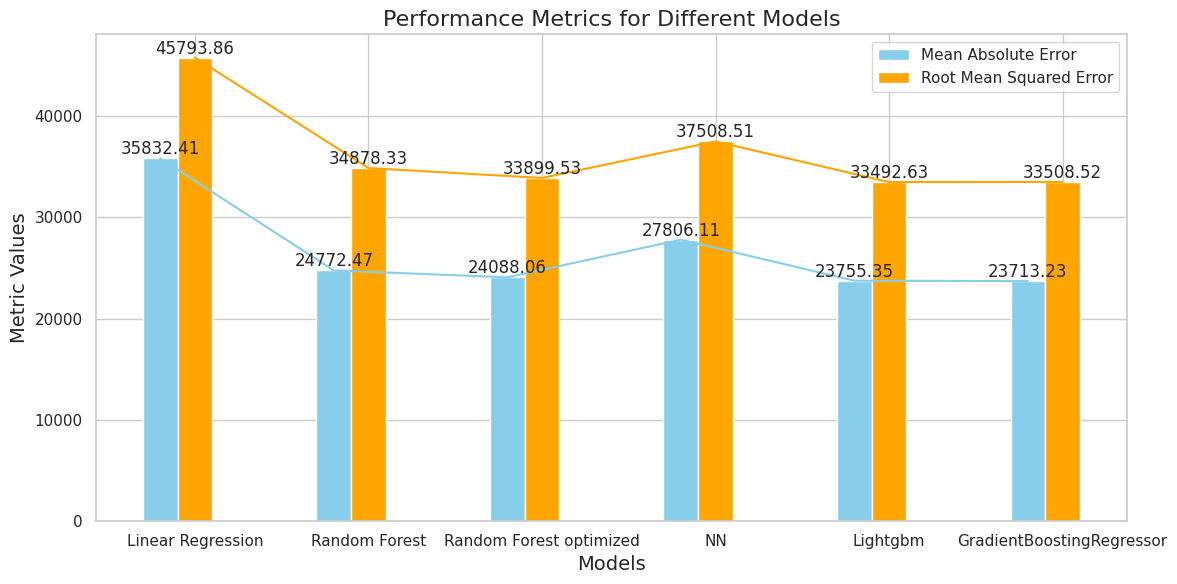

In [38]:
# Visualize metrics
models = ['Linear Regression', 'Random Forest', 'Random Forest optimized', 'NN', 'Lightgbm', 'GradientBoostingRegressor']

mae_values = [
    mean_absolute_error(y_test, y_pred_linear),
    mean_absolute_error(y_test, y_pred_rf1),
    mean_absolute_error(y_test, y_pred_test_rf2),
    mean_absolute_error(y_test, y_pred_nn),
    mean_absolute_error(y_test, y_pred_lgbm),
    mean_absolute_error(y_test, y_pred_gbm)


]
mse_values = [
    np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf1)),
    np.sqrt(mean_squared_error(y_test, y_pred_test_rf2)),
    np.sqrt(mean_squared_error(y_test, y_pred_nn)),
    np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
    np.sqrt(mean_squared_error(y_test, y_pred_gbm))
]


sns.set(style="whitegrid")

# Create a bar plot for each metric
plt.figure(figsize=(12, 6))
bar_width = 0.2

# Create bars
bars1 = plt.bar(np.arange(len(models)), mae_values, width=bar_width, label='Mean Absolute Error', color='skyblue')
bars2 = plt.bar(np.arange(len(models)) + bar_width, mse_values, width=bar_width, label='Root Mean Squared Error', color='orange')
#bars3 = plt.bar(np.arange(len(models)) + 2 * bar_width, r2_values, width=bar_width, label='R-squared', color='lightgreen')

# Connect bars by a line
plt.plot([bar.get_x() + bar.get_width() / 2 for bar in bars1], mae_values, color='skyblue')
plt.plot([bar.get_x() + bar.get_width() / 2 for bar in bars2], mse_values, color='orange')
# plt.plot([bar.get_x() + bar.get_width() / 2 for bar in bars3], r2_values, color='lightgreen')

# Add values on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Metric Values', fontsize=14)
plt.title('Performance Metrics for Different Models', fontsize=16)
plt.xticks(np.arange(len(models)) + bar_width, models)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()




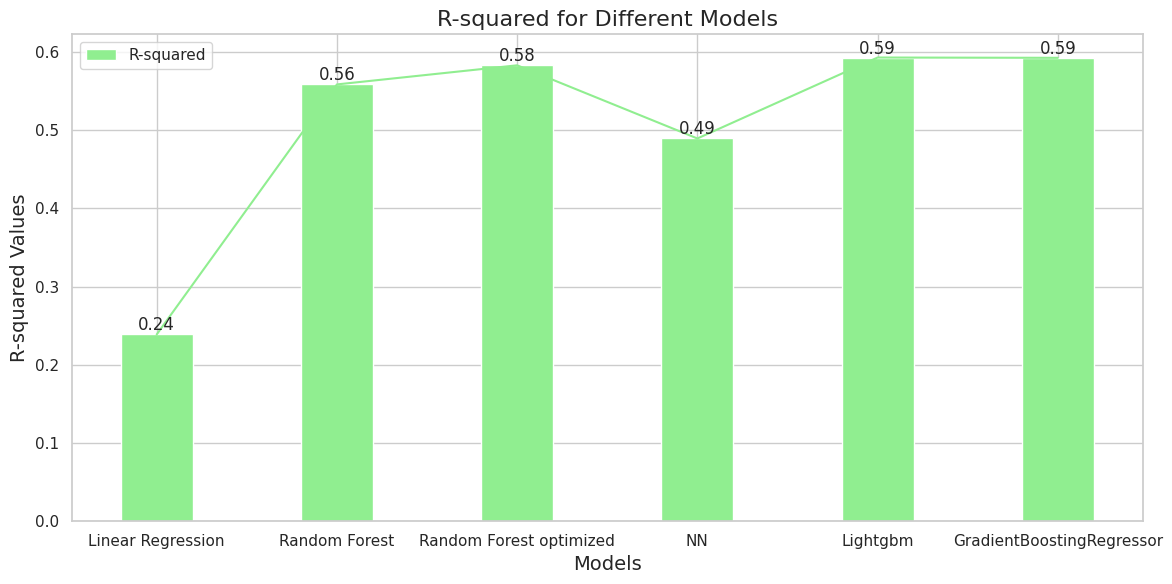

In [39]:
r2_values = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_rf1),
    r2_score(y_test, y_pred_test_rf2),
    r2_score(y_test, y_pred_nn),
    r2_score(y_test, y_pred_lgbm),
    r2_score(y_test, y_pred_gbm)
]

sns.set(style="whitegrid")

# Create a bar plot for R-squared values
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Create bars
bars = plt.bar(np.arange(len(models)), r2_values, width=bar_width, label='R-squared', color='lightgreen')

# Connect bars by a line
plt.plot([bar.get_x() + bar.get_width() / 2 for bar in bars], r2_values, color='lightgreen')

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-squared Values', fontsize=14)
plt.title('R-squared for Different Models', fontsize=16)
plt.xticks(np.arange(len(models)), models)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**EX12** Make a prediction for a software developer in `Spain`, with `Master's degree` and 15 years of experience.

In [40]:
new_data = pd.DataFrame({'Country': ['Spain'], 'EdLevel': ['Master’s degree'], 'YearsCodePro': [15]})

new_data['Country'] = le_country.transform(new_data['Country'])
new_data['EdLevel'] = le_education.transform(new_data['EdLevel'])

predicted_salary_linreg = model_linreg.predict(new_data)
predicted_salary_rf1 = rf_model.predict(new_data)
predicted_salary_rf2 = random_forest_reg.predict(new_data)
predicted_salary_nn = model_nn.predict(new_data).flatten()
predicted_salary_gbm = pipeline.predict(new_data)
predicted_salary_lgbm = lgbm_regressor.predict(new_data)

print("Predicted Salary by Linear Regression:", predicted_salary_linreg[0])
print("Predicted Salary by Random Forest", predicted_salary_rf1[0])
print("Predicted Salary by Optimal Random Forest:", predicted_salary_rf2[0])
print("Predicted Salary by Neural Net:", predicted_salary_nn[0])
print("Predicted Salary by Gradient Boosting Regressor", predicted_salary_gbm[0])
print("Predicted Salary by LightGBM:", predicted_salary_lgbm[0])


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
Predicted Salary by Linear Regression: 105069.52563046761
Predicted Salary by Random Forest 68104.4257996633
Predicted Salary by Optimal Random Forest: 66327.06999180534
Predicted Salary by Neural Net: 28427822.21982189
Predicted Salary by Gradient Boosting Regressor 69757.87358575236
Predicted Salary by LightGBM: 67532.769963238


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Comparisons:

# 3. Communicating results through a Visual Analytics web tool.

We are ready to share our results with our Consultant team and customers. To do it, we will create a Data product using the Streamlit framework. This web app should have a least 2 tabs: one for data exploration and other for salary prediction.

Before building this app, you should store the ML model and labencoders in a **pickle** format as follows. This pickle file will be the one you need to call in your web app.

In [41]:
import pickle

In [42]:
data = {"model_rf_best": random_forest_reg, "model_linreg": model_linreg, "model_nn": model_nn , "model_gbm": pipeline, "model_lgbm": lgbm_regressor,"le_country": le_country, "le_education": le_education}
with open('saved_models.pkl', 'wb') as file:
    pickle.dump(data, file)

You can verify the pickle file works as follows: first, open the file storing into 3 variables the regressor, the labencoder for country and the labencoder for education.

In [43]:
with open('saved_models.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model_rf_best"]
le_country = data["le_country"]
le_education = data["le_education"]

You can also make a prediction with a sample as follows:

In [44]:
y_pred = regressor_loaded.predict(new_data)
y_pred

array([66327.06999181])

Now, you are ready to go to next step: building the Visual Analytics tool based on Streamlit. Recall, your app should have a main .py file (for instante, **my_app.py**) and a folder called **pages** with all .py files you want to show in your app.